### 집 가격 예측
> https://www.kaggle.com/datasets/muhammadbinimran/housing-price-prediction-data

#### **Features**
1. SquareFeet - 집의 면적
2. Bedrooms - 침실 수
3. Bathrooms - 화장실 수
4. Neighborhood - (Rural-농촌, Urban-도시, Suburb-도시 외곽)
5. YearBuilt - 건축일
6. Price - 가격(target)

In [1]:
import pandas as pd

h_df = pd.read_csv('./datasets/housing_price_dataset.csv')
h_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


- 결측치 확인

In [2]:
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


- 중복 확인

In [3]:
h_df.duplicated().sum()

0

- 문자열로 된 Neighborhood 확인

In [4]:
h_df.Neighborhood.value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [5]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # 확인할 데이터프레임
# dataframe = h_df

# std = StandardScaler()

# # 데이터프레임의 타겟컬럼(맨뒤 가정) 제외하고 확인
# features = dataframe.iloc[:, :-1].columns

# total_count = dataframe.shape[0]
# for feature in features:
#     std_df = std.fit_transform(dataframe[[feature]])
#     count = ((std_df < -1.96) | (std_df > 1.96)).sum()
#     print(f'{feature}: {count}건, {np.round(count / total_count * 100, 4)}%')

- Neighborhood는 시골, 도시외곽, 도시 순으로 0, 1, 2로 직접 변경

In [6]:
# 카테고리를 숫자로 매핑할 딕셔너리 생성
mapping = {'Rural': 0, 'Suburb': 1, 'Urban': 2}

# 카테고리를 숫자로 매핑하여 새로운 열 생성
h_df['Neighborhood'] = h_df['Neighborhood'].map(mapping)

# 변환된 데이터프레임 확인
h_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080.865895
49996,2854,2,2,1,1988,374507.656727
49997,2979,5,3,1,1962,384110.555590
49998,2596,5,2,0,1984,380512.685957


In [7]:
h_df['Neighborhood'].value_counts()

Neighborhood
1    16721
0    16676
2    16603
Name: count, dtype: int64

- Price의 소수점이 너무 많아 그냥 int타입으로 형변환

In [8]:
import numpy as np

h_df.Price = h_df.Price.astype(int)
h_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355
1,2459,3,2,0,1980,195014
2,1860,2,1,1,1970,306891
3,2294,2,1,2,1996,206786
4,2130,5,2,1,2001,272436
...,...,...,...,...,...,...
49995,1282,5,3,0,1975,100080
49996,2854,2,2,1,1988,374507
49997,2979,5,3,1,1962,384110
49998,2596,5,2,0,1984,380512


array([[<Axes: title={'center': 'SquareFeet'}>,
        <Axes: title={'center': 'Bedrooms'}>],
       [<Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Neighborhood'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

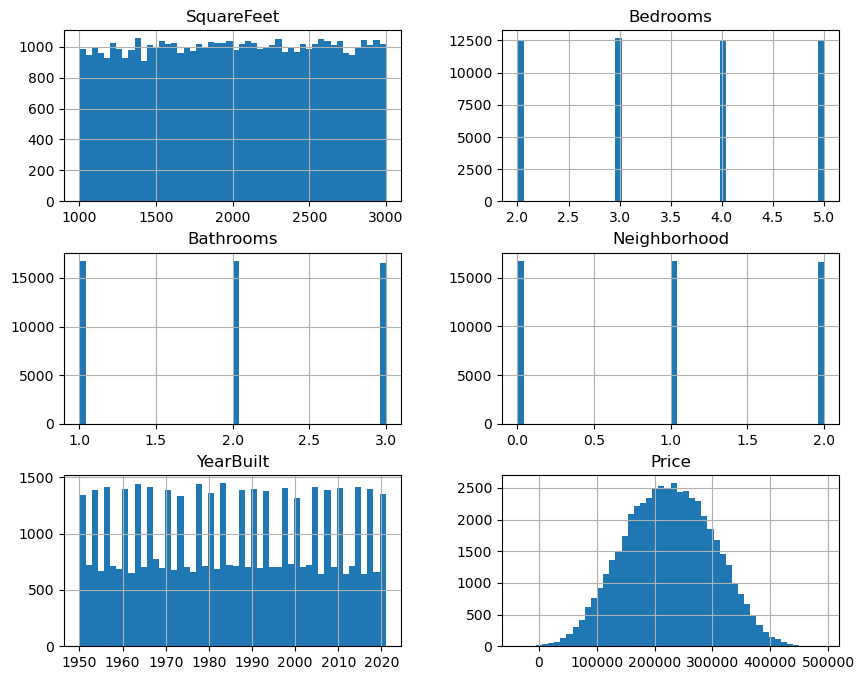

In [9]:
h_df.hist(figsize=(10, 8), bins=50)

- Price에 0보다 작은 값이 있어 제거

In [ ]:
h_df[h_df.Price < 0]

In [10]:
h_df = h_df[h_df.Price > 0]

In [11]:
from statsmodels.api import OLS

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):              148748.305
Model:                            OLS   Adj. R-squared (uncentered):         148763.188
Method:                 Least Squares   F-statistic:                             -9995.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        1.00
Time:                        17:20:56   Log-Likelihood:                     -6.1150e+05
No. Observations:               49978   AIC:                                  1.223e+06
Df Residuals:                   49973   BIC:                                  1.223e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [13]:
get_vif(features)

,vif_score,feature
0,13.150496,SquareFeet
1,10.814259,Bedrooms
2,6.979588,Bathrooms
3,2.498082,Neighborhood
4,30.310280,YearBuilt


In [14]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = h_df.iloc[:, :-1], h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [17]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 2512153742.1935, RMSE: 50121.3901, MSLE: 0.0826, RMSLE: 0.2874, R2: 0.5626


- YearBuilt 제거 후 다시 확인

In [20]:
pre_h_df = h_df.iloc[:, 0:4]
pre_h_df['Price'] = h_df.Price
pre_h_df.reset_index(drop=True, inplace=True)
pre_h_df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,Price
0,2126,4,1,0,215355
1,2459,3,2,0,195014
2,1860,2,1,1,306891
3,2294,2,1,2,206786
4,2130,5,2,1,272436
...,...,...,...,...,...
49973,1282,5,3,0,100080
49974,2854,2,2,1,374507
49975,2979,5,3,1,384110
49976,2596,5,2,0,380512


In [21]:
from statsmodels.api import OLS

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):              148753.624
Model:                            OLS   Adj. R-squared (uncentered):         148765.531
Method:                 Least Squares   F-statistic:                         -1.249e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        1.00
Time:                        17:24:40   Log-Likelihood:                     -6.1150e+05
No. Observations:               49978   AIC:                                  1.223e+06
Df Residuals:                   49974   BIC:                                  1.223e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [23]:
get_vif(features)

,vif_score,feature
0,7.889232,SquareFeet
1,7.335875,Bedrooms
2,5.623695,Bathrooms
3,2.381366,Neighborhood


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_h_df.iloc[:, :-1], pre_h_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.3, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [41]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 2489654860.8293, RMSE: 49896.4414, MSLE: 0.0817, RMSLE: 0.2859, R2: 0.5666


In [43]:
test_df = pre_h_df.drop(labels=['Neighborhood'], axis=1)
test_df

,SquareFeet,Bedrooms,Bathrooms,Price
0,2126,4,1,215355
1,2459,3,2,195014
2,1860,2,1,306891
3,2294,2,1,206786
4,2130,5,2,272436
...,...,...,...,...
49973,1282,5,3,100080
49974,2854,2,2,374507
49975,2979,5,3,384110
49976,2596,5,2,380512


In [44]:
from statsmodels.api import OLS

features, targets = test_df.iloc[:, :-1], test_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):              148784.751
Model:                            OLS   Adj. R-squared (uncentered):         148793.682
Method:                 Least Squares   F-statistic:                         -1.666e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        1.00
Time:                        17:44:51   Log-Likelihood:                     -6.1150e+05
No. Observations:               49978   AIC:                                  1.223e+06
Df Residuals:                   49975   BIC:                                  1.223e+06
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
get_vif(features)

,vif_score,feature
0,7.585356,SquareFeet
1,7.175477,Bedrooms
2,5.554572,Bathrooms
